In [1]:
import torch
import torchvision
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from processing import grey_to_rgb, imshow, imexpl
import matplotlib.pyplot as plt
import numpy as np

#### Loading dataset object
We define the transforms we want to perform on the dataset:
- Convert image to tensor
- Normalize the image with the mean and standard deviation of 0.5 and 0.5 respectively( This causes the image to be in the range of [-1,1] )
- Resize the image to 96x192 as described by the paper
- Convert images with single channel to have 3 channels

In [2]:
transform = transforms.Compose(
        [   transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)),
            transforms.Resize((96, 192), antialias=True),
            transforms.Lambda(grey_to_rgb),
        ]
    )
dataset = datasets.Caltech256(
        "./DATA",
        download=True,
        transform=transform,
    )

Files already downloaded and verified


#### Splitting dataset into train and test
- We split the dataset into train and test with a ratio of 80:20.(24486, 6121)
- we use a random seed of 42 to ensure reproducibility.()

In [4]:
random_seed = torch.Generator().manual_seed(42) 
train, test = torch.utils.data.random_split(dataset, [0.8, 0.2], generator=random_seed)
print(f'length of trainset: {len(train)}') #24486
print(f'length of testset: {len(test)}') #6121
print(f' length of dataset: {len(dataset)}') #30607

length of trainset: 24486
length of testset: 6121
 length of dataset: 30607


#### Understanding the classes in torchvision's datasets
- The classes are defined by names of the datasets itself (in this case: Caltech-256)
- Each class needs to have an `__init__` , `__len__` and `__getitem__` method defined.
- The `__init__` method is used to initialize the class and the `__len__` method is used to return the length of the dataset and the __getitem__ method is used to return the item at a given index.
- The `__getitem__` method is called whenever and index is passed the object (eg: object[2]) returns and image and its corresponding label in this case

#### How the data is retrieved
- For `dataset` by calling `dataset[2]` we get the image and its corresponding label for the second data point in the dataset, which in the case of Caltech-256 is an `AK47` image, which is the third image in the first class of the dataset. Similarily `dataset[30606]` returns the last image in the dataset (as the dataset contains totally 30607 images)
- The same principle is applied to the `train_loader` and `test_loader` objects as well.

#### Visualizing the dataset

Sampling last image of dataset:Caltech256
 image shape:torch.Size([3, 96, 192]), label:256


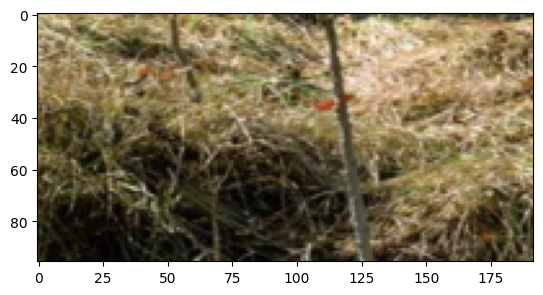

Sampling last image of dataset:Subset
 image shape:torch.Size([3, 96, 192]), label:84


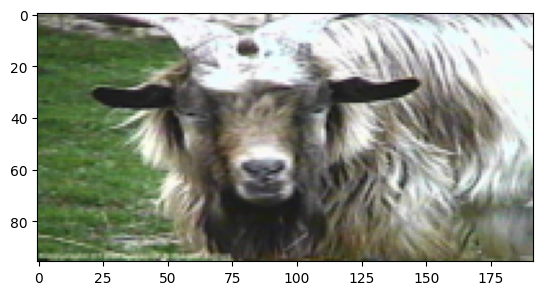

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sampling last image of dataset:Subset
 image shape:torch.Size([3, 96, 192]), label:144


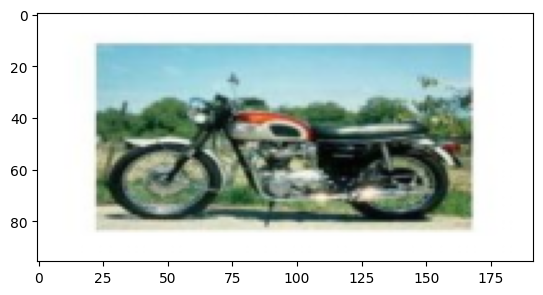

In [5]:
data_list = [dataset, train, test]
data_size = [len(dataset), len(train), len(test)]
for i,d in enumerate(data_list):
    print(f'Sampling last image of dataset:{d.__class__.__name__}')
    img, label = d[data_size[i]-1]
    print(f' image shape:{img.shape}, label:{label}')
    imshow(img)